In [146]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)

### OECD
https://data.oecd.org/
- "Value added in financial and insurance activities": "DV_VA" (% of GDP)
- "General government net lending": "IV_lending" (% of GDP)
- "Real effective exchange rates": "C_REER" (index, 2010=100)
- "CPI: all items": "C_cpi" (growth rate)

- "Gross domestic product (output approach)": "C_gdp"

### WB
https://databank.worldbank.org/home.aspx
- "Foreign direct investment, net outflows (% of GDP)": "IV_fdi_outflow"
- "Net trade in goods and services (BoP, current US$)": "IV_trade_balance"
- "Broad money (% of GDP)": "C_M2"

### GDD 
https://www.imf.org/external/datamapper/datasets/GDD
- "nfc_ls"(nonfinancial corporate debt, loans and debt securities, % of GDP): "DV_nfc_ls"
- "hh_ls"(houshold debt, loans and debt securities, % of GDP): "DV_hh_ls"

### Historical Puclic Finance 
https://www.imf.org/external/np/fad/histdb/index.htm
- "exp"(government expenditure, % of GDP): "IV_gov_exp"

### WID
https://wid.world/data/
- "gini": "IV_gini"

### WIID
https://www.wider.unu.edu/database/wiid

#### OECD Database Import

In [147]:
# import OECD.csv and select features
oecd = pd.read_csv('../data_source/OECD.csv')

In [148]:
# database cleaning
def oecd_clean(df):
    
    # select columns
    df = df[['Subject','Country','Year','Value']]
    # select subjects
    df = df.loc[(df['Subject']=='Value added in financial and insurance activities')
                |(df['Subject']=='General government net lending')
                |(df['Subject']=='Real effective exchange rates')
                |(df['Subject']=='CPI: all items')]
    
    # replace country names to a common form
    country_rep = {"China (People's Republic of)": "China"}
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
        
    return df

oecd = oecd_clean(oecd)

In [149]:
# import gdp.csv/OECD
gdp = pd.read_csv('../data_source/gdp.csv')

In [150]:
# database cleaning
def gdp_clean(df):
    
    # select measure
    df = df.loc[df['MEASURE']=='VXVOB']
    
    # rename columns
    df = df[['Transaction','Country','Year','Value']]
    # rename column
    df = df.rename(columns={'Transaction':'Subject'})
    
    # delete subject that is not a country
    sub_del = ['European Union (28 countries)', 'OECD - Total', 'Euro area (19 countries)']
    df = df[~df.Country.isin(sub_del)]
    
    # replace country names to a common form
    country_rep = {"China (People's Republic of)": "China"}
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
        
    return df

gdp = gdp_clean(gdp)

#### World Bank Database Import

In [151]:
# database cleaning
def wb_clean(df):
    # drop unnecessary columns
    df = df.drop(['Unnamed: 0', 'Country Code', 'Indicator Code', 'V65'], axis=1)
    # change from wide to long format
    df = df.pivot_table(index='Country Name', columns='Indicator Name').unstack().reset_index()
    # rename columns
    df = df.rename(columns={'level_0':'Year', 'Indicator Name':'Subject',
                                       'Country Name':'Country', 0:'Value'})
    convert_dict = {'Year': int, 
                'Value': float} 
  
    # delete subject that is not a country
    sub_del = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'Early-demographic dividend', 
           'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)',
           'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)',
           'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations',
           'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
           'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean',
           'Latin America & Caribbean (excluding high income)', 'Latin America & the Caribbean (IDA & IBRD countries)',
           'Least developed countries: UN classification', 'Low & middle income',
           'Low income', 'Lower middle income', 'Middle East & North Africa', 
           'Middle East & North Africa (excluding high income)', 'Middle East & North Africa (IDA & IBRD countries)', 
           'Middle income', 'North America', 'OECD - Total', 'OECD members', 'Other small states', 'Pacific island small states',
           'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'South Africa', 'South Asia',
           'South Asia (IDA & IBRD)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
           'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World']

    df = df[~df.Country.isin(sub_del)]
    
    df = df.astype(convert_dict)
    # replace country names to a common form
    country_rep = {"Russian Federation" : "Russia",
                   "Korea, Rep." : "Korea",
                   "Micronesia, Fed. Sts.": "Micronesia",
                   "Timor-Leste": "Timor Leste",
                   "Venezuela, RB": "Venezuela",
                   "Yemen, Rep.": "Yemen",
                   "Syrian Arab Republic": "Syria",
                   "Iran, Islamic Rep.": "Iran",
                   "Hong Kong SAR, China": "Hong Kong SAR",
                   "Macao SAR, China": "Macao SAR",
                   "China (People's Republic of)": "China",
                   "Brunei Darussalam": "Brunei",
                   "Lao PDR": "Laos",
                   "Egypt, Arab Rep.": "Egypt"}
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
        
    return df

In [152]:
fdi_outflow = pd.read_csv('../data_source/outflow.csv')
fdi_outflow = wb_clean(fdi_outflow)

trade_balance = pd.read_csv('../data_source/netgoodservices.csv')
trade_balance = wb_clean(trade_balance)

m2 = pd.read_csv('../data_source/broad_money.csv')
m2 = wb_clean(m2)

#### IMF GDD Database Import

In [153]:
gdd = pd.read_csv('../data_source/global_debt_database.csv')

# database cleaning
def gdd_clean(df):
    # select columns
    df = df[['country', 'year', 'nfc_ls', 'hh_ls']]
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country'})
    # change country name
    country_rep = {"Russian Federation" : "Russia",
                   "Korea, Republic of" : "Korea",
                   "Micronesia, Fed. Sts.": "Micronesia",
                   "Timor-Leste": "Timor Leste",
                   "Venezuela, RB": "Venezuela",
                   "Yemen, Rep.": "Yemen",
                   "Syrian Arab Republic": "Syria",
                   "Iran, Islamic Rep.": "Iran",
                   "Hong Kong SAR, China": "Hong Kong SAR",
                   "Macao SAR, China": "Macao SAR",
                   "China, Mainland": "China",
                   "Brunei Darussalam": "Brunei",
                   "Iran, I. Rep. Of": "Iran",
                   "Marshall Islands, Rep.": "Marshall Islands",
                   "São Tomé and Príncipe": "Sao Tome and Principe",
                   "U.A.E.": "United Arab Emirates",
                   "Venezuela, Republica Bolivariana de": "Venezuela",
                   "Antigua & Barbuda": "Antigua and Barbuda",
                   "Bosnia & Herzegovina": "Bosnia and Herzegovina",
                   "Trinidad & Tobago": "Trinidad and Tobago",
                   "Congo, Dem. Rep. of": "Congo, Dem. Rep.",
                   "Congo, Republic of": "Congo, Rep.",
                   "Cote D'Ivoire": "Cote d'Ivoire",
                   "Taiwan Province of China": "Taiwan",
                   "C.A.R.": "Central African Republic"
                  }
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
    
    # replace 0 with NAs
    df.replace(0, np.nan, inplace=True)
    
    return df

gdd = gdd_clean(gdd)

#### Public Finance Database Import

In [154]:
public_finance = pd.read_csv('../data_source/historical_public_finance_dataset.csv')

# clean public_finance dataframe
def public_finance_clean(df):
    # select columns
    df = df[['country', 'year', 'exp']]
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country'})
    
    # change country name
    country_rep = {"Russian Federation" : "Russia",
                   "South Korea" : "Korea",
                   "Hong Kong": "Hong Kong SAR"
                     }
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
    
    # replace 0 with NAs
    df.replace(0, np.nan, inplace=True)
    
    return df

public_finance = public_finance_clean(public_finance)

#### Gini Database Import

In [155]:
gini = pd.read_csv('../data_source/gini.csv')

# database cleaning
def gini_clean(df):
    # select columns
    df = df[['V1', 'V4', 'V5']]
    # rename columns
    df = df.rename(columns={'V4':'Year', 'V1':'Country', 'V5':'gini'})
    
    # change country name
    country_rep = {"China (People's Republic of)": "China",
                   "South Korea" : "Korea"
                     }
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])
    
    # replace 0 with NAs
    df.replace(0, np.nan, inplace=True)
    
    return df

gini = gini_clean(gini)

#### WIID Database Import

In [156]:
wiid = pd.read_csv('../data_source/WIID_31MAR2021.csv')

In [157]:
def gdp_wiid_clean(df):
    # select columns
    df = df[['country', 'year', 'gdp']]
    # drop duplicates
    df = df.drop_duplicates(['year', 'gdp'])
    # rename column
    df = df.rename(columns={'gdp': 'gdp_wiid'})
    
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country'})
    
    # change country name
    country_rep = {"China (People's Republic of)": "China",
                   "Korea, Republic of" : "Korea",
                   "Congo, Democratic Republic of the": "Congo, Dem. Rep.",
                   "Congo, Republic of the": "Congo, Rep.",
                   "Slovakia": "Slovak Republic",
                   "Timor-Leste": "Timor Leste",
                   "Hong Kong": "Hong Kong SAR",
                   "Kyrgyzstan": "Kyrgyz Republic",
                   "Micronesia, Federated States of": "Micronesia",
                   "Czechia": "Czech Republic"
                     }
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])

    return df

gdp_wiid = gdp_wiid_clean(wiid)

In [158]:
wgini = pd.read_csv('../data_source/relaxed_gini.csv')

In [159]:
def gini_wiid_clean(df):
    # select columns
    df = df[['country', 'year', 'gini']]

    # rename column
    df = df.rename(columns={'gini': 'gini_wiid'})
    
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country'})
    
    # change country name
    country_rep = {"China (People's Republic of)": "China",
                   "Korea, Republic of" : "Korea",
                   "Congo, Democratic Republic of the": "Congo, Dem. Rep.",
                   "Congo, Republic of the": "Congo, Rep.",
                   "Slovakia": "Slovak Republic",
                   "Timor-Leste": "Timor Leste",
                   "Hong Kong": "Hong Kong SAR",
                   "Kyrgyzstan": "Kyrgyz Republic",
                   "Micronesia, Federated States of": "Micronesia",
                   "Czechia": "Czech Republic"
                     }
    for rep in country_rep:
        df.Country = df.Country.replace(rep, country_rep[rep])

    return df

wgini = gini_wiid_clean(wgini)

#### Combine Databases

In [160]:
# combine the above databases
oecd = oecd.append([gdp, fdi_outflow, trade_balance, m2])
oecd = oecd.sort_values(by=['Country', 'Subject', 'Year'])
oecd = oecd.pivot_table(values='Value', index=['Country', 'Year'], columns=['Subject']).reset_index()

oecd = pd.merge(oecd, gdd, on=['Country', 'Year'], how='outer')
oecd = pd.merge(oecd, public_finance, on=['Country', 'Year'], how='outer')
oecd = pd.merge(oecd, gini, on=['Country', 'Year'], how='outer')
oecd = pd.merge(oecd, gdp_wiid, on=['Country', 'Year'], how='outer')
oecd = pd.merge(oecd, wgini, on=['Country', 'Year'], how='outer')

In [161]:
oecd = oecd.rename(columns={
    "Value added in financial and insurance activities": "DV_VA",
    "nfc_ls": "DV_nfc_ls",
    "hh_ls": "DV_hh_ls",
    "General government net lending": "IV_lending",
    "exp": "IV_gov_exp",
    "gini": "IV_gini",
    "Net trade in goods and services (BoP, current US$)": "IV_trade_balance",
    "Foreign direct investment, net outflows (% of GDP)": "IV_fdi_outflow",
    "Real effective exchange rates": "C_REER",
    "CPI: all items": "C_cpi",
    "Gross domestic product (output approach)": "C_gdp",
    "Broad money (% of GDP)": "C_M2",
    "gdp_wiid": "C_wgdp",
    "gini_wiid": "IV_wgini"
})

In [162]:
oecd.isnull().sum()

Country             0    
Year                0    
C_M2                14810
C_cpi               19919
IV_fdi_outflow      14338
IV_lending          21070
C_gdp               20065
IV_trade_balance    15547
C_REER              20389
DV_VA               20903
DV_nfc_ls           19897
DV_hh_ls            19882
IV_gov_exp          16588
IV_gini             21227
C_wgdp              18430
IV_wgini            18549
dtype: int64

In [163]:
# get log of C_gdp and IV_trade_balance
oecd['C_gdp_log'] = np.log(oecd['C_gdp'])
oecd['C_wgdp_log'] = np.log(oecd['C_wgdp'])
oecd['IV_trade_balance_log'] = np.sign(oecd['IV_trade_balance'])*np.log(abs(oecd['IV_trade_balance']))

In [164]:
# get lag 1 period of DV
oecd['DV_VA_lag1'] = oecd['DV_VA'].shift(1)
oecd['DV_nfc_ls_lag1'] = oecd['DV_nfc_ls'].shift(1)
oecd['DV_hh_ls_lag1'] = oecd['DV_hh_ls'].shift(1)

In [165]:
# get lag 1 period and 2 periods of IV
oecd['IV_lending_lag1'] = oecd['IV_lending'].shift(1)
oecd['IV_gov_exp_lag1'] = oecd['IV_gov_exp'].shift(1)
oecd['IV_gini_lag1'] = oecd['IV_gini'].shift(1)
oecd['IV_wgini_lag1'] = oecd['IV_wgini'].shift(1)
oecd['IV_trade_balance_loglag1'] = oecd['IV_trade_balance_log'].shift(1)
oecd['IV_fdi_outflow_lag1'] = oecd['IV_fdi_outflow'].shift(1)

oecd['IV_lending_lag2'] = oecd['IV_lending'].shift(2)
oecd['IV_gov_exp_lag2'] = oecd['IV_gov_exp'].shift(2)
oecd['IV_gini_lag2'] = oecd['IV_gini'].shift(2)
oecd['IV_wgini_lag2'] = oecd['IV_wgini'].shift(2)
oecd['IV_trade_balance_loglag2'] = oecd['IV_trade_balance_log'].shift(2)
oecd['IV_fdi_outflow_lag2'] = oecd['IV_fdi_outflow'].shift(2)

In [166]:
# get DV's percentage change 
oecd['DV_VA_pc'] = oecd['DV_VA'].pct_change()
oecd['DV_nfc_ls_pc'] = oecd['DV_nfc_ls'].pct_change()
oecd['DV_hh_ls_pc'] = oecd['DV_hh_ls'].pct_change()

# get lag 1 period of DV_plus 
oecd['DV_VA_pc_lag1'] = oecd['DV_VA_pc'].shift(1)
oecd['DV_nfc_ls_pc_lag1'] = oecd['DV_nfc_ls_pc'].shift(1)
oecd['DV_hh_ls_pc_lag1'] = oecd['DV_hh_ls_pc'].shift(1)

In [167]:
# get IV's percentage change
oecd['IV_lending_pc'] = oecd['IV_lending'].pct_change()
oecd['IV_gov_exp_pc'] = oecd['IV_gov_exp'].pct_change()
oecd['IV_trade_balance_pc'] = oecd['IV_trade_balance'].pct_change()
#oecd['IV_fdi_outflow_pc'] = oecd['IV_fdi_outflow'].pct_change()

# get lag 1 period and 2 periods of IV_plus
oecd['IV_lending_pc_lag1'] = oecd['IV_lending_pc'].shift(1)
oecd['IV_gov_exp_pc_lag1'] = oecd['IV_gov_exp_pc'].shift(1)
oecd['IV_trade_balance_pc_lag1'] = oecd['IV_trade_balance_pc'].shift(1)
#oecd['IV_fdi_outflow_pc_lag1'] = oecd['IV_fdi_outflow_pc'].shift(1)

oecd['IV_lending_pc_lag2'] = oecd['IV_lending_pc'].shift(2)
oecd['IV_gov_exp_pc_lag2'] = oecd['IV_gov_exp_pc'].shift(2)
oecd['IV_trade_balance_pc_lag2'] = oecd['IV_trade_balance_pc'].shift(2)

In [168]:
# get CV's percentage change
#oecd['C_NFLplus'] = oecd['C_NFL'].pct_change()
#oecd['C_REERplus'] = oecd['C_REER'].pct_change()
#oecd['C_cpiplus'] = oecd['C_cpi'].pct_change()
oecd['C_gdpplus'] = oecd['C_gdp'].pct_change()
oecd['C_wgdpplus'] = oecd['C_wgdp'].pct_change()
oecd['C_m2plus'] = oecd['C_M2'].pct_change()

In [169]:
oecd.to_csv('../data_processing/financialization_df.csv')

In [170]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
oecd.describe()

<ipython-input-170-5eae15464d34>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Year,C_M2,C_cpi,IV_fdi_outflow,IV_lending,C_gdp,IV_trade_balance,C_REER,DV_VA,DV_nfc_ls,DV_hh_ls,IV_gov_exp,IV_gini,C_wgdp,IV_wgini,C_gdp_log,C_wgdp_log,IV_trade_balance_log,DV_VA_lag1,DV_nfc_ls_lag1,DV_hh_ls_lag1,IV_lending_lag1,IV_gov_exp_lag1,IV_gini_lag1,IV_wgini_lag1,IV_trade_balance_loglag1,IV_fdi_outflow_lag1,IV_lending_lag2,IV_gov_exp_lag2,IV_gini_lag2,IV_wgini_lag2,IV_trade_balance_loglag2,IV_fdi_outflow_lag2,DV_VA_pc,DV_nfc_ls_pc,DV_hh_ls_pc,DV_VA_pc_lag1,DV_nfc_ls_pc_lag1,DV_hh_ls_pc_lag1,IV_lending_pc,IV_gov_exp_pc,IV_trade_balance_pc,IV_lending_pc_lag1,IV_gov_exp_pc_lag1,IV_trade_balance_pc_lag1,IV_lending_pc_lag2,IV_gov_exp_pc_lag2,IV_trade_balance_pc_lag2,C_gdpplus,C_wgdpplus,C_m2plus
count,22070.000000,7260.000000,2151.000000,7732.000000,1000.000000,2.005000e+03,6.523000e+03,1681.000000,1167.000000,2173.000000,2188.000000,5482.000000,843.000000,3640.000000,3521.000000,2005.000000,3640.000000,6523.000000,1167.000000,2173.000000,2188.000000,1000.000000,5482.000000,843.000000,3520.000000,6523.000000,7732.000000,1000.000000,5482.000000,843.000000,3519.000000,6523.000000,7732.000000,21690.000000,22035.000000,22035.000000,21689.000000,22034.000000,22034.000000,21709.000000,21847.000000,22050.000000,21708.000000,21846.000000,22049.000000,21707.000000,21845.000000,22048.000000,21803.000000,22033.000000,22069.000000
mean,1942.685410,44.868399,17.169918,3.315432,-2.103180,8.830486e+05,6.426399e+08,113.502852,5.759766,65.054288,36.097140,20.225501,0.474866,19687.026923,37.616592,12.538192,9.456093,-7.242130,5.759766,65.054288,36.097140,-2.103180,20.225501,0.474866,37.614210,-7.242130,3.315432,-2.103180,20.225501,0.474866,37.613618,-7.242130,3.315432,0.000875,0.034827,0.007923,0.000875,0.034829,0.007923,-0.044669,0.005313,0.071293,-0.044671,0.005313,0.071296,-0.044673,0.005313,0.071299,0.004195,0.013156,0.007317
std,61.799484,36.132999,111.734892,34.716962,4.066963,2.025638e+06,3.722568e+10,109.803378,3.669052,51.382599,29.254155,14.207177,0.117940,17376.764287,10.245040,1.522116,1.031385,19.387554,3.669052,51.382599,29.254155,4.066963,14.207177,0.117940,10.245521,19.387554,34.716962,4.066963,14.207177,0.117940,10.246917,19.387554,34.716962,0.077439,3.601456,0.200094,0.077441,3.601538,0.200099,4.657923,0.111315,27.645099,4.658030,0.111318,27.645726,4.658137,0.111320,27.646353,0.181432,0.280622,0.120197
min,1800.000000,2.857408,-7.633931,-89.616745,-32.061638,6.644201e+03,-7.617150e+11,31.343123,1.504824,0.067251,0.084322,0.684444,0.123687,385.000000,15.900000,8.801500,5.953243,-27.358838,1.504824,0.067251,0.084322,-32.061638,0.684444,0.123687,15.900000,-27.358838,-89.616745,-32.061638,0.684444,0.123687,15.900000,-27.358838,-89.616745,-0.832127,-0.999245,-0.995387,-0.832127,-0.999245,-0.995387,-658.657206,-0.948290,-885.134740,-658.657206,-0.948290,-885.134740,-658.657206,-0.948290,-885.134740,-0.995881,-0.984668,-0.950781
25%,1898.000000,21.253640,2.001092,0.069469,-4.224411,1.123802e+05,-1.234305e+09,93.548723,3.987677,30.028783,11.555301,9.400000,0.393227,7082.750000,30.100000,11.629643,8.865418,-20.933774,3.987677,30.028783,11.555301,-4.224411,9.400000,0.393227,30.100000,-20.933774,0.069469,-4.224411,9.400000,0.393227,30.100000,-20.933774,0.069469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1963.000000,34.643827,3.806390,0.576955,-2.371919,2.608106e+05,-1.632838e+08,101.711250,4.910704,56.446726,29.929266,16.087500,0.447517,14256.500000,35.410000,12.471550,9.564968,-18.911001,4.910704,56.446726,29.929266,-2.371919,16.087500,0.447517,35.405000,-18.911001,0.576955,-2.371919,16.087500,0.447517,35.400000,-18.911001,0.576955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1991.000000,56.699092,8.671794,2.203445,0.050139,7.841446e+05,2.932634e+08,110.607980,6.278231,87.860427,53.625746,27.

In [171]:
oecd.describe().to_csv('../data_processing/variable_describe.csv')

In [ ]:
oecd

In [40]:
#convert year to datetime
oecd['Year'] = pd.to_datetime(oecd['Year'], format='%Y')
#add column year to index
df = oecd.set_index('Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)

In [41]:
from linearmodels import PooledOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

def pooled_ols(df, exog_vars, dv):
    exog = sm.add_constant(df[exog_vars])
    mod = PooledOLS(df[dv], exog)
    pooled_res = mod.fit()
    print(pooled_res)
    
    # Store values for checking homoskedasticity graphically
    fittedvals_pooled_OLS = pooled_res.predict().fitted_values
    residuals_pooled_OLS = pooled_res.resids
    
    # Residuals-Plot for growing Variance Detection: Homoskedasticity
    fig, ax = plt.subplots()
    ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
    ax.axhline(0, color = 'r', ls = '--')
    ax.set_xlabel("Predicted Values", fontsize = 15)
    ax.set_ylabel("Residuals", fontsize = 15)
    ax.set_title("Homoskedasticity Test", fontsize = 30)
    plt.show()
    
    return pooled_res

In [42]:
# Perform FE
from linearmodels import PanelOLS

def fe(df, exog_vars, dv):
    exog = sm.add_constant(df[exog_vars])
    mod = PanelOLS(df[dv], exog)
    fe_res = mod.fit(cov_type='clustered', cluster_entity=True)
    print(fe_res)
    
    return fe

In [43]:
# Perform RE
from linearmodels import RandomEffects

def re(df, exog_vars, dv):
    exog = sm.add_constant(df[exog_vars])
    mod = RandomEffects(df[dv], exog)
    re_res = mod.fit()
    print(re_res)
    
    return re

                          PooledOLS Estimation Summary                          
Dep. Variable:              DV_VAplus   R-squared:                        0.0004
Estimator:                  PooledOLS   R-squared (Between):             -0.0029
No. Observations:               12102   R-squared (Within):               0.0006
Date:                Wed, Apr 21 2021   R-squared (Overall):              0.0004
Time:                        20:31:38   Log-likelihood                  1.07e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.6575
Entities:                          49   P-value                           0.7083
Avg Obs:                       246.98   Distribution:                 F(7,12094)
Min Obs:                       23.000                                           
Max Obs:                       600.00   F-statistic (robust):             0.6575
                            

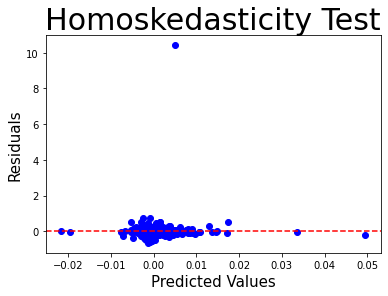

                          PanelOLS Estimation Summary                           
Dep. Variable:              DV_VAplus   R-squared:                        0.0004
Estimator:                   PanelOLS   R-squared (Between):             -0.0029
No. Observations:               12102   R-squared (Within):               0.0006
Date:                Wed, Apr 21 2021   R-squared (Overall):              0.0004
Time:                        20:31:38   Log-likelihood                  1.07e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.6575
Entities:                          49   P-value                           0.7083
Avg Obs:                       246.98   Distribution:                 F(7,12094)
Min Obs:                       23.000                                           
Max Obs:                       600.00   F-statistic (robust):             0.4744
                            

In [47]:
exog_vars = ["IV_lendingplus", "DV_VAplus_lag1", "IV_wgini", "IV_trade_balanceplus", "C_wgdp", "C_REER", "C_cpi"]
pols_va = pooled_ols(df, exog_vars, 'DV_VAplus')
fe_va = fe(df, exog_vars, 'DV_VAplus')
re_va = re(df, exog_vars, 'DV_VAplus')

In [302]:
# Perform PooledOLS
exog_vars = ["IV_lending", "IV_trade_balance_log", "C_gdp_log", "C_REER", "C_M2", "C_cpi"]
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DV_VA, exog)
pooled_res = mod.fit()
print(pooled_res)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooled_res.predict().fitted_values
residuals_pooled_OLS = pooled_res.resids

                          PooledOLS Estimation Summary                          
Dep. Variable:                  DV_VA   R-squared:                        0.1722
Estimator:                  PooledOLS   R-squared (Between):              0.1179
No. Observations:                 271   R-squared (Within):               0.1826
Date:                Sun, Apr 18 2021   R-squared (Overall):              0.1722
Time:                        20:58:33   Log-likelihood                   -612.16
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.1548
Entities:                          35   P-value                           0.0000
Avg Obs:                       7.7429   Distribution:                   F(6,264)
Min Obs:                       1.0000                                           
Max Obs:                       15.000   F-statistic (robust):             9.1548
                            

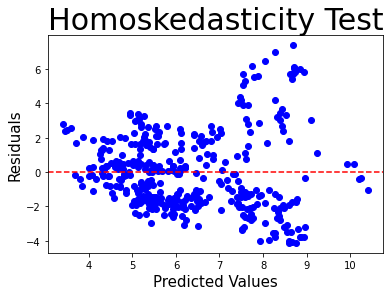

In [142]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 30)
plt.show()

In [180]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)

exog_fill = exog.fillna(0)
white_test_results = het_white(pooled_OLS_dataset["residual"], exog_fill)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset["residual"], exog_fill)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

AssertionError: 